### Text Classification with ML
+ assigning text to their predefined category or class
+ grouping text into their classes

+ Using Udemy Dataset
+ Predict the subject/category of course title


### Workflow
+ EDA
+ Building Features From the Text
    - Vectorization (Tfidf,CountVectorizer)
+ Model Building
    - Single Approach
    - Pipeline Approach
    
+ Model Evaluation
+ Model Interpretation
+ Productionize Model

In [29]:
# Load EDA Pkgs
import pandas as pd
import neattext.functions as nfx

In [30]:
# Load Data Viz
import seaborn as sns

In [31]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [32]:
# Load Dataset
df = pd.read_csv("data/udemy_courses.csv")

In [33]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [34]:
# Shape
df.shape

(3683, 12)

In [35]:
df[['course_title','subject']]

,course_title,subject
0,Ultimate Investment Banking Course,Business Finance
1,Complete GST Course & Certification - Grow You...,Business Finance
2,Financial Modeling for Business Analysts and C...,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,Business Finance
4,How To Maximize Your Profits Trading Options,Business Finance
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Web Development
3679,How To Design A WordPress Website With No Codi...,Web Development
3680,Learn and Build using Polymer,Web Development
3681,CSS Animations: Create Amazing Effects on Your...,Web Development


### Text Preprocessing
+ Reduce Noise
    - Punct
    - Special Char
    - Stopword
+ Lemmatization/Stemming

In [37]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [39]:
df['course_title'].apply(nfx.remove_stopwords)

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow Pra...
2        Financial Modeling Business Analysts Consultants
3            Beginner Pro - Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678     Learn jQuery Scratch - Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681       CSS Animations: Create Amazing Effects Website
3682            MODX CMS Build Websites: Beginner's Guide
Name: course_title, Length: 3683, dtype: object

In [44]:
# Remove stopwords
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [45]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [46]:
# Remove special characters
df['clean_course_title'] = df['clean_course_title'].apply(nfx.remove_special_characters)

In [49]:
# Reduce to lowercase
df['clean_course_title'] = df['clean_course_title'].str.lower()

In [50]:
df[['clean_course_title','course_title']]

,clean_course_title,course_title
0,ultimate investment banking course,Ultimate Investment Banking Course
1,complete gst course certification grow practice,Complete GST Course & Certification - Grow You...
2,financial modeling business analysts consultants,Financial Modeling for Business Analysts and C...
3,beginner pro financial analysis excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,maximize profits trading options,How To Maximize Your Profits Trading Options
...,...,...
3678,learn jquery scratch master javascript library,Learn jQuery from Scratch - Master of JavaScri...
3679,design wordpress website coding,How To Design A WordPress Website With No Codi...
3680,learn build polymer,Learn and Build using Polymer
3681,css animations create amazing effects website,CSS Animations: Create Amazing Effects on Your...


### Building Features From the Text
+ Convert words to vectors of number
+ Tfidf
+ Count
+ Hashvec

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
Xfeatures = df['clean_course_title']
ylabels = df['subject']

In [53]:
Xfeatures

0                      ultimate investment banking course
1       complete gst course  certification  grow practice
2        financial modeling business analysts consultants
3             beginner pro  financial analysis excel 2017
4                        maximize profits trading options
                              ...                        
3678      learn jquery scratch  master javascript library
3679                      design wordpress website coding
3680                                  learn build polymer
3681        css animations create amazing effects website
3682              modx cms build websites beginners guide
Name: clean_course_title, Length: 3683, dtype: object

In [54]:
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(Xfeatures)

In [55]:
X

<3683x3564 sparse matrix of type '<class 'numpy.float64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [56]:
X.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
# Convert to DF
df_vec = pd.DataFrame(X.todense(),columns=tfidf_vec.get_feature_names())

In [59]:
df_vec.T

,0,1,2,3,4,5,6,7,8,9,...,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682
000005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zombie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuhause,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
### Building Models
+ Single Approach*
    - Separately
+ Pipeline
    -Combine

In [60]:
# Split our dataset
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(X,ylabels,test_size=0.3,random_state=42)

In [62]:
x_train.shape

(2578, 3564)

In [63]:
# Build Model
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [64]:
# Acccuracy
lr_model.score(x_test,y_test)

0.9547511312217195

In [ ]:
### Evaluate our model

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix

In [66]:
y_pred = lr_model.predict(x_test)

In [68]:
# Confusion Matrix : true pos,false pos,etc
confusion_matrix(y_pred,y_test)

array([[382,  20,   8,   5],
       [  1, 142,   0,   2],
       [  1,   1, 183,   0],
       [  2,   9,   1, 348]])

In [69]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

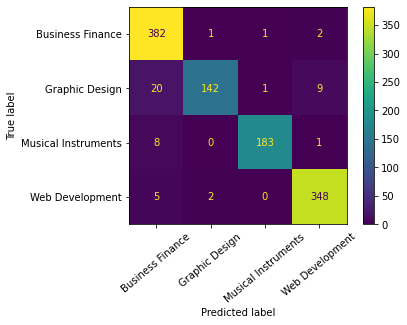

In [71]:
plot_confusion_matrix(lr_model,x_test,y_test,xticks_rotation=40)

In [72]:
# Classification Report
print(classification_report(y_pred,y_test))

                     precision    recall  f1-score   support

   Business Finance       0.99      0.92      0.95       415
     Graphic Design       0.83      0.98      0.90       145
Musical Instruments       0.95      0.99      0.97       185
    Web Development       0.98      0.97      0.97       360

           accuracy                           0.95      1105
          macro avg       0.94      0.96      0.95      1105
       weighted avg       0.96      0.95      0.96      1105



In [73]:
### Making A Single Prediction
ex = "Building A Simple ML Web App"

In [76]:
def vectorize_text(text):
    my_vec = tfidf_vec.transform([text])
    return my_vec.toarray()

In [77]:
vectorize_text(ex)

array([[0., 0., 0., ..., 0., 0., 0.]])

In [78]:
sample1 = vectorize_text(ex)

In [79]:
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [80]:
# Prediction Prob
lr_model.predict_proba(sample1)

array([[0.0452693 , 0.03089783, 0.03488388, 0.88894899]])

In [84]:
lr_model.classes_

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

### Model Interpretation
+ Eli5
+ Lime
+ shap

In [85]:
# Load Model Inter Pkg
import eli5

In [87]:
# SHow the Weight for each prediction
eli5.show_weights(lr_model)

In [88]:
tfidf_vec.get_feature_names()

['000005',
 '001',
 '01',
 '02',
 '10',
 '100',
 '101',
 '101master',
 '102',
 '10k',
 '10th',
 '11',
 '110',
 '111creating',
 '112',
 '12',
 '123d',
 '13',
 '13customer',
 '14',
 '15',
 '150',
 '16',
 '16propertyplant',
 '17',
 '175',
 '175pa',
 '18',
 '183pa',
 '1872',
 '188',
 '19',
 '1a',
 '1presentation',
 '1year',
 '20',
 '200',
 '201',
 '2012',
 '2013',
 '20132016365',
 '2014',
 '2015',
 '20153',
 '2016',
 '20162017',
 '2017',
 '20172018',
 '2020',
 '21',
 '23',
 '24',
 '24hrs',
 '25',
 '263432aprende',
 '265888learn',
 '28',
 '2creating',
 '2d',
 '2hour',
 '2x',
 '30',
 '30day',
 '31',
 '35',
 '38',
 '398746piano',
 '3course',
 '3d',
 '3dcgblender',
 '3ds',
 '3tier',
 '40',
 '42038learn',
 '45',
 '48',
 '4a',
 '4d',
 '4hours',
 '4trial',
 '50',
 '500',
 '52',
 '53',
 '54',
 '59',
 '5creating',
 '5k',
 '5ths',
 '60',
 '60mins',
 '61',
 '650804guitar',
 '66',
 '70461',
 '70462',
 '72',
 '800',
 '8020',
 '874284weekly',
 '88',
 '8accounting',
 '8currency',
 '90',
 '94',
 '97',
 'a

In [89]:
# See the actual word of the features
# Method 1
eli5.show_weights(lr_model,feature_names=tfidf_vec.get_feature_names())

In [90]:
# Method 2:
eli5.show_weights(lr_model,vec=tfidf_vec)

In [91]:
# Interpreting a Single Prediction
lr_model.predict(sample1)

array(['Web Development'], dtype=object)

In [92]:
sample1

array([[0., 0., 0., ..., 0., 0., 0.]])

In [93]:
ex

'Building A Simple ML Web App'

In [94]:
eli5.show_prediction(lr_model,ex,vec=tfidf_vec)

In [95]:
ex2 = 'Python tutorial for data science'

In [96]:
lr_model.predict(vectorize_text(ex2))

array(['Web Development'], dtype=object)

In [97]:
eli5.show_prediction(lr_model,ex2,vec=tfidf_vec)

In [98]:
# Save Model
import joblib

In [99]:
model_file = open("lr_model_for_udemy_course_prediction_06_feb_2021.pkl","wb")
joblib.dump(lr_model,model_file)
model_file.close()

In [100]:
### Method 2: Pipeline Approach
# Transformers
tf_vec = TfidfVectorizer()
# Estimators
lr_clf = LogisticRegression()
nv_clf = MultinomialNB()

In [101]:
from sklearn.pipeline import make_pipeline,Pipeline

In [102]:
pipe_lr = make_pipeline(tf_vec,lr_clf)

In [103]:
pipe_nv = make_pipeline(tf_vec,nv_clf)  

In [104]:
# Steps
pipe_lr.steps

[('tfidfvectorizer', TfidfVectorizer()),
 ('logisticregression', LogisticRegression())]

In [105]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [106]:
x_train2

3068                                 getting started html
2889       web security common vulnerabilities mitigation
3338                 introduction qgis python programming
168     accounting basics 66 minutes absolutely beginners
3414         complete login registration system php mysql
                              ...                        
1130                                complete forex trader
1294                   santa claus photoshop manipulation
860     cfa level foundation introduction financial re...
3507                             professional css flexbox
3174           supercharging development atom text editor
Name: clean_course_title, Length: 2578, dtype: object

In [107]:
# Fit Our dataset
pipe_lr = pipe_lr.fit(x_train2,y_train2)

In [108]:
pipe_lr.score(x_test2,y_test2)

0.9601809954751132

In [109]:
# Fit Our dataset
pipe_nv = pipe_nv.fit(x_train2,y_train2)
pipe_nv.score(x_test2,y_test2)

0.9420814479638009

In [111]:
pipe_nv.predict([ex])

array(['Web Development'], dtype='<U19')